___
# Titanic
___

___
## Information on the dataset
___

* Features of the dataset

  * class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
  * name - Name
  * sex - Sex
  * age - Age
  * sibsp - Number of Siblings/Spouses Aboard
  * parch - Number of Parents/Children Aboard
  * ticket - Ticket Number
  * fare - Passenger Fare
  * cabin - Cabin
  * embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

* Target 

    * survival - Survival (0 = No; 1 = Yes)

___
## Importing project dependencies
___

In [592]:
!pip install feature-engine

In [593]:
# import project dependencies

# processing libraries
import numpy as np
import pandas as pd

# visualization libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn  as sns
from mpl_toolkits.mplot3d import Axes3D

# mpl extras
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
plt.style.use('dark_background')


# math n statistic library
from scipy import stats

# to read matplotlib inline
%matplotlib inline

# for string operatoions
import re

___
## Importing the dataset
___

In [594]:
# reading in the datset
df = pd.read_csv('train.csv')
df_raw = df.copy()

In [595]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [596]:
# info on the dataseet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [597]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Canavan, Miss. Mary",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [598]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [599]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [600]:
# Let's find the missing values in the dataset

In [601]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* Two coulums in the dataset contain NaN values.

In [602]:
df.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [603]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [604]:
pd.DataFrame(np.round(df.isna().mean()*100,2),columns=['% of Missing Data'])

,% of Missing Data
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Ticket,0.00
Fare,0.00


* Around 20 percent of values are missing from the Age variable  (Imputation preferred)
* Around 77 percent of values are missing from the Cabin variable (Dropping of the column preferred)
* Less than 2.5 percent of values are missing from the Embarked varible (dropping the missing observations which contain the Embarked data missing preferred)

In [605]:
# LEt's check for '?' values in the dataset

miss_count = 0

for col in df.columns:

  for obs in range (len(df)):

    if df[col][obs] == '?' or df[col][obs] == '999':

      count += 1

miss_count


0

* No.there are no "?" values in the dataset either

In [606]:
# Let's drop the redundant columns

In [607]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Redundant Columns:
  * PassengerId
  * Ticket
  * Cabin (due to more than 77 percent of missing values)


In [608]:
# drop the above columns
df.drop(['PassengerId','Ticket','Cabin'],1,inplace=True)

In [609]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


___
## Feature Enginerring, Imputation, and Treating Outliers 
___

In [610]:
# Fetaure engineering the name column
df.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [611]:
# We can get the out of the prefix
compiler = re.compile('Miss|Mrs|Master|Mr')
prefix = 'Miss|Mrs|Master|Mr'.split('|')
df['Prefix'] = df.Name.apply(lambda x:compiler.findall(x))
df['Prefix'] = df.Prefix.apply(lambda x:''.join(x))
df.Prefix[~df.Prefix.isin(prefix)] = 'Mr'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [612]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Prefix
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


* The name column us is of no further use to use so let's drop it

In [613]:
# dropping the name column
df.drop('Name',1,inplace=True)

In [614]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Prefix
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [615]:
# Family members 
df['on_board_fam_members(incl.you)'] = df.SibSp+df.Parch+1

In [616]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Prefix,on_board_fam_members(incl.you)
0,0,3,male,22.0,1,0,7.2500,S,Mr,2
1,1,1,female,38.0,1,0,71.2833,C,Mrs,2
2,1,3,female,26.0,0,0,7.9250,S,Miss,1
3,1,1,female,35.0,1,0,53.1000,S,Mrs,2
4,0,3,male,35.0,0,0,8.0500,S,Mr,1


In [617]:
df.isna().sum()

Survived                            0
Pclass                              0
Sex                                 0
Age                               177
SibSp                               0
Parch                               0
Fare                                0
Embarked                            2
Prefix                              0
on_board_fam_members(incl.you)      0
dtype: int64

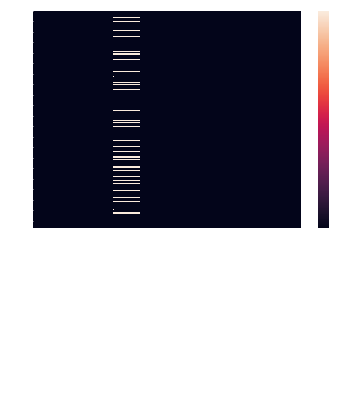

In [618]:
sns.heatmap(df.isna())

In [619]:
# drop the 2 observation with the nan values from the Embark Variale
df.dropna(subset=['Embarked'],inplace=True)

In [620]:
df.isna().sum()

Survived                            0
Pclass                              0
Sex                                 0
Age                               177
SibSp                               0
Parch                               0
Fare                                0
Embarked                            0
Prefix                              0
on_board_fam_members(incl.you)      0
dtype: int64

In [621]:
# Now Let's impute the Age variable
from feature_engine.missing_data_imputers import MeanMedianImputer,_find_numerical_variables
numerical_variables = _find_numerical_variables(df)

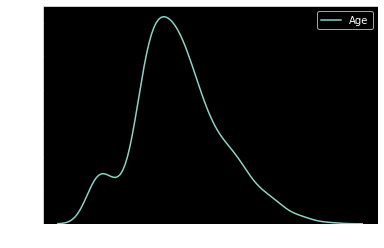

In [622]:
# check the kde of Age to check either to use median or mean
sns.kdeplot(df.Age)

In [623]:
df.describe()['Age']

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [624]:
imputer = MeanMedianImputer(imputation_method='median',variables=['Age'])
df = imputer.fit_transform(df)

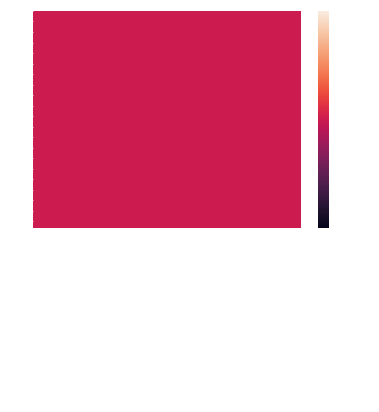

In [625]:
sns.heatmap(df.isna())

* A clean Slate

In [626]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Prefix,on_board_fam_members(incl.you)
0,0,3,male,22.0,1,0,7.2500,S,Mr,2
1,1,1,female,38.0,1,0,71.2833,C,Mrs,2
2,1,3,female,26.0,0,0,7.9250,S,Miss,1
3,1,1,female,35.0,1,0,53.1000,S,Mrs,2
4,0,3,male,35.0,0,0,8.0500,S,Mr,1


In [627]:
# finding the outliers in the dataset using zscore
z_scores=stats.zscore(df[numerical_variables])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_cleaned_z = df[filtered_entries]


In [628]:
len(df)-len(df_cleaned_z)

71

* 71 Outliers are found in the datset and are filtered
 

In [629]:
# assign the filtered dataset back to df dataframe
df = df_cleaned_z.copy()


In [630]:
# Check the skewness of the data
stats.skew(df[numerical_variables]).reshape(-1,1)

array([[ 0.45642857],
       [-0.63801807],
       [ 0.39475182],
       [ 1.97214917],
       [ 2.1146572 ],
       [ 2.33855055],
       [ 1.72376803]])

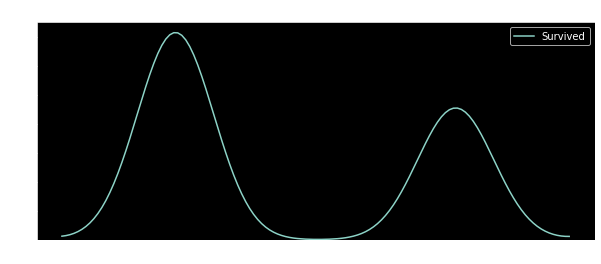

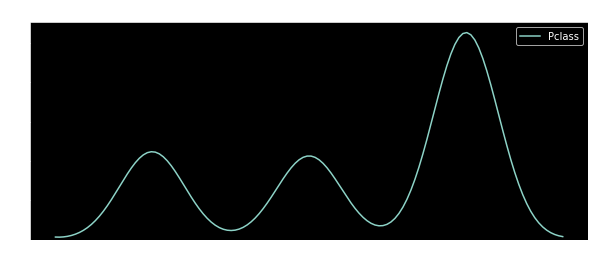

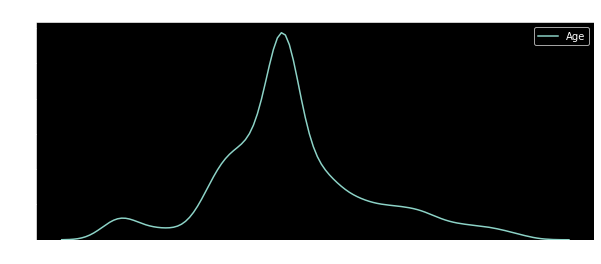

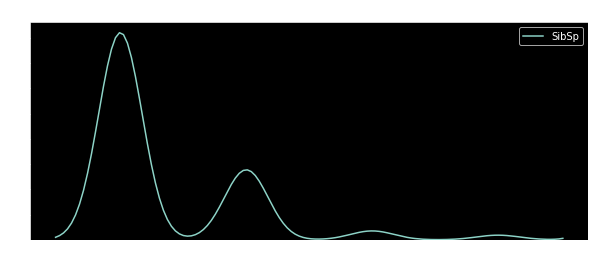

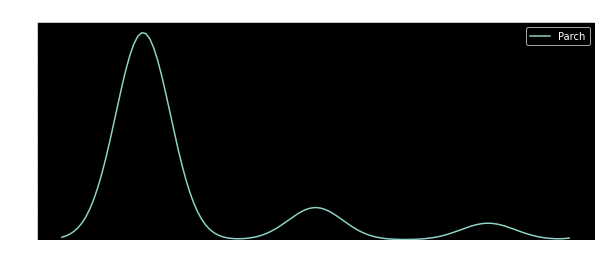

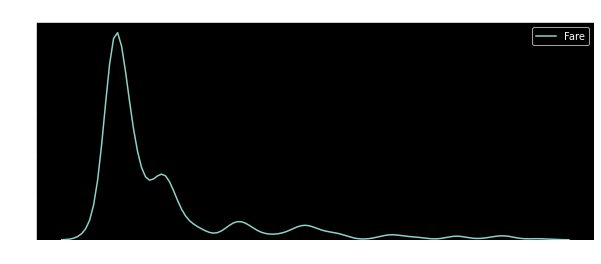

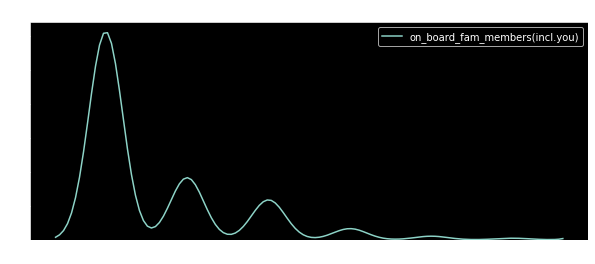

In [631]:
for col in df[numerical_variables]:

        plt.figure(figsize=(10,4))
        plt.title(col)
        sns.kdeplot(df[col])
        plt.show()

* We can see that some of the featrues are extremely skewed
* Let's remove the skewness using log transformation

In [632]:
df[numerical_variables[1:]] = np.log(df[numerical_variables[1:]]+1)  # we added +1 to the log transformation to avoid the zero error

In [633]:
stats.skew(df[numerical_variables[1:]])  # since the 0th element is  our target variable

array([-0.79247298, -2.41422055,  1.28672935,  1.82509492,  0.19812798,
        1.17115764])

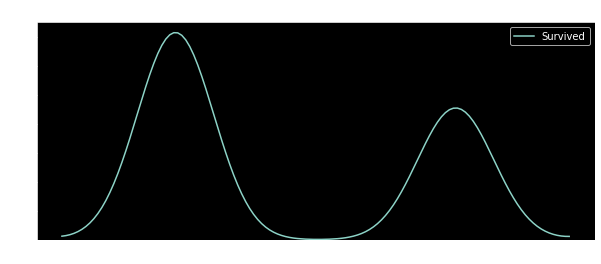

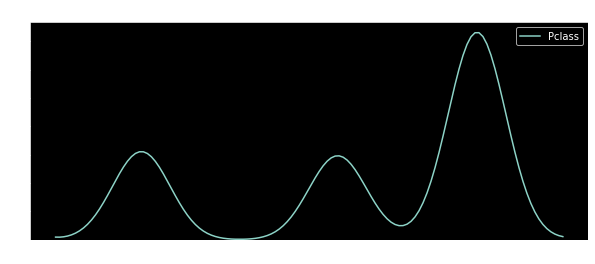

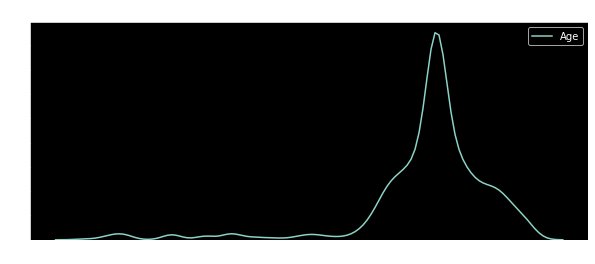

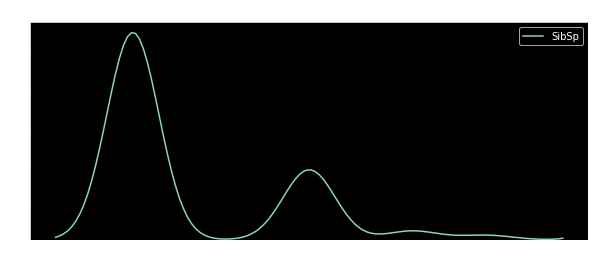

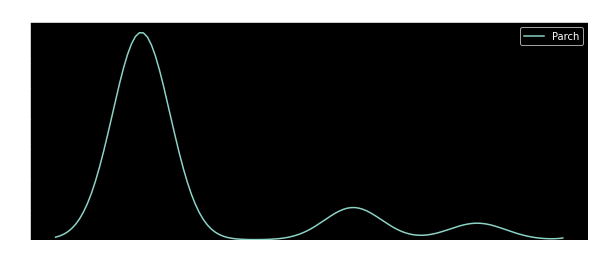

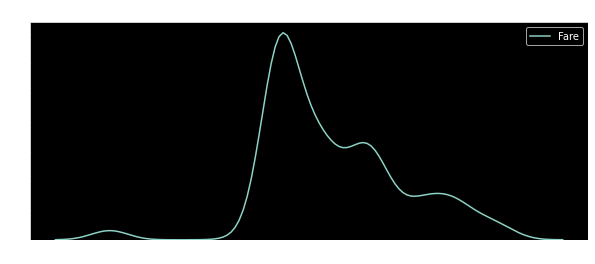

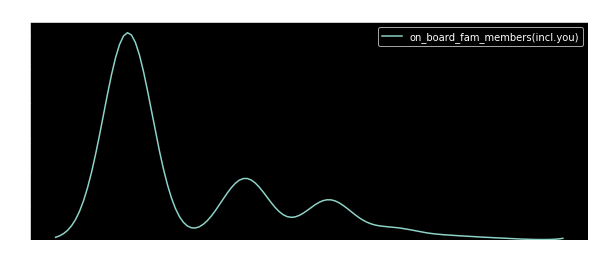

In [634]:
for col in df[numerical_variables]:

        plt.figure(figsize=(10,4))
        plt.title(col)
        sns.kdeplot(df[col])
        plt.show()

___
## Encoding
___

In [635]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Prefix,on_board_fam_members(incl.you)
0,0,1.386294,male,3.135494,0.693147,0.0,2.110213,S,Mr,1.098612
1,1,0.693147,female,3.663562,0.693147,0.0,4.280593,C,Mrs,1.098612
2,1,1.386294,female,3.295837,0.000000,0.0,2.188856,S,Miss,0.693147
3,1,0.693147,female,3.583519,0.693147,0.0,3.990834,S,Mrs,1.098612
4,0,1.386294,male,3.583519,0.000000,0.0,2.202765,S,Mr,0.693147


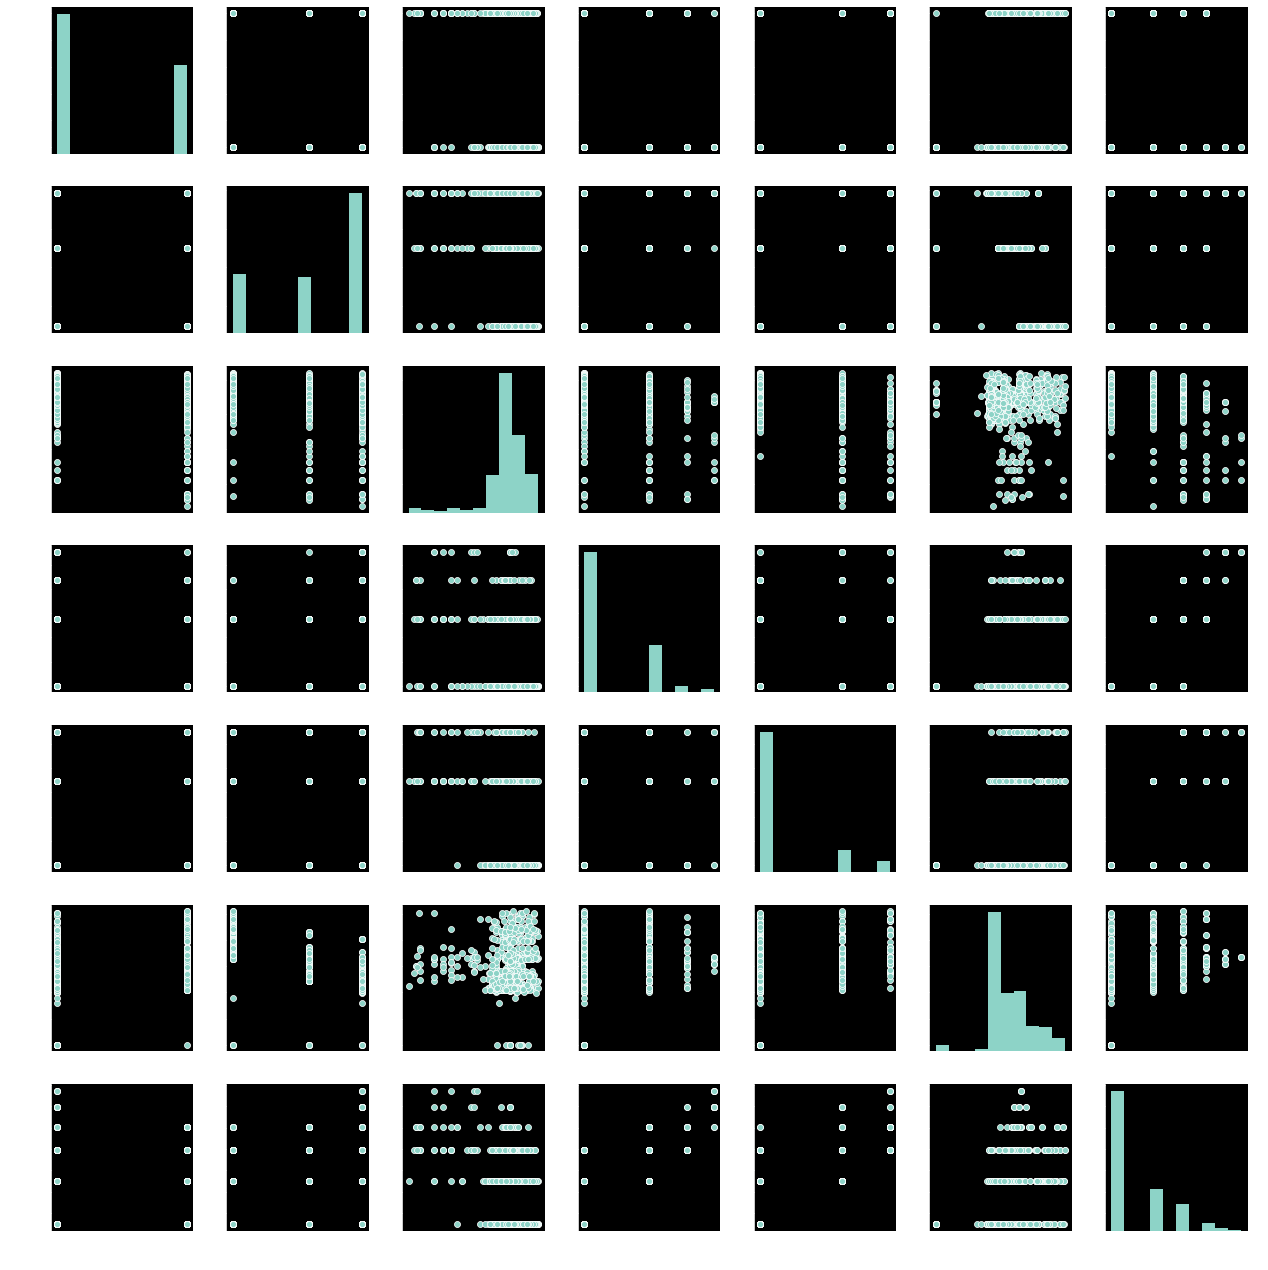

In [636]:
sns.pairplot(df)

In [637]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Prefix,on_board_fam_members(incl.you)
0,0,1.386294,male,3.135494,0.693147,0.0,2.110213,S,Mr,1.098612
1,1,0.693147,female,3.663562,0.693147,0.0,4.280593,C,Mrs,1.098612
2,1,1.386294,female,3.295837,0.000000,0.0,2.188856,S,Miss,0.693147
3,1,0.693147,female,3.583519,0.693147,0.0,3.990834,S,Mrs,1.098612
4,0,1.386294,male,3.583519,0.000000,0.0,2.202765,S,Mr,0.693147


In [638]:
### Encoding the categorical data
df_cleaned = df.copy()

# Importing the encoging dependencies
from feature_engine.categorical_encoders import OneHotCategoricalEncoder,_find_categorical_variables

category = _find_categorical_variables(df)

encoder = OneHotCategoricalEncoder(variables=category,drop_last=True)

df_cleaned = encoder.fit_transform(df)

In [639]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Prefix,on_board_fam_members(incl.you)
0,0,1.386294,male,3.135494,0.693147,0.0,2.110213,S,Mr,1.098612
1,1,0.693147,female,3.663562,0.693147,0.0,4.280593,C,Mrs,1.098612
2,1,1.386294,female,3.295837,0.000000,0.0,2.188856,S,Miss,0.693147
3,1,0.693147,female,3.583519,0.693147,0.0,3.990834,S,Mrs,1.098612
4,0,1.386294,male,3.583519,0.000000,0.0,2.202765,S,Mr,0.693147


In [640]:
df_cleaned.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,on_board_fam_members(incl.you),Sex_male,Embarked_S,Embarked_C,Prefix_Mr,Prefix_Mrs,Prefix_Miss
0,0,1.386294,3.135494,0.693147,0.0,2.110213,1.098612,1,1,0,1,0,0
1,1,0.693147,3.663562,0.693147,0.0,4.280593,1.098612,0,0,1,0,1,0
2,1,1.386294,3.295837,0.000000,0.0,2.188856,0.693147,0,1,0,0,0,1
3,1,0.693147,3.583519,0.693147,0.0,3.990834,1.098612,0,1,0,0,1,0
4,0,1.386294,3.583519,0.000000,0.0,2.202765,0.693147,1,1,0,1,0,0


In [641]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818 entries, 0 to 890
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Survived                        818 non-null    int64  
 1   Pclass                          818 non-null    float64
 2   Age                             818 non-null    float64
 3   SibSp                           818 non-null    float64
 4   Parch                           818 non-null    float64
 5   Fare                            818 non-null    float64
 6   on_board_fam_members(incl.you)  818 non-null    float64
 7   Sex_male                        818 non-null    int64  
 8   Embarked_S                      818 non-null    int64  
 9   Embarked_C                      818 non-null    int64  
 10  Prefix_Mr                       818 non-null    int64  
 11  Prefix_Mrs                      818 non-null    int64  
 12  Prefix_Miss                     818 

In [642]:
# Convert Age to  integer datatype

In [643]:
df_cleaned.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,on_board_fam_members(incl.you),Sex_male,Embarked_S,Embarked_C,Prefix_Mr,Prefix_Mrs,Prefix_Miss
count,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000
mean,0.388753,1.161639,3.298150,0.222539,0.158460,2.858186,0.904292,0.658924,0.726161,0.187042,0.635697,0.136919,0.195599
std,0.487765,0.282022,0.576063,0.365756,0.337235,0.893931,0.308405,0.474361,0.446200,0.390183,0.481529,0.343972,0.396904
min,0.000000,0.693147,0.350657,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.098612,3.178054,0.000000,0.000000,2.185579,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.386294,3.367296,0.000000,0.000000,2.639057,0.693147,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.386294,3.583519,0.693147,0.000000,3.316003,1.098612,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.386294,4.204693,1.386294,1.098612,5.111184,1.945910,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


___
## EDA 
___

In [644]:
df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


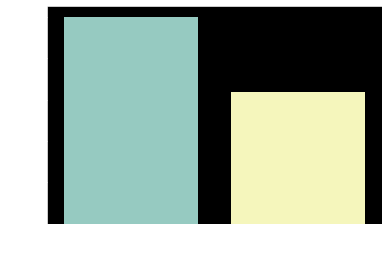

In [645]:
# age 
sns.countplot(df.Survived)

* Most of the people die in the shipwreck

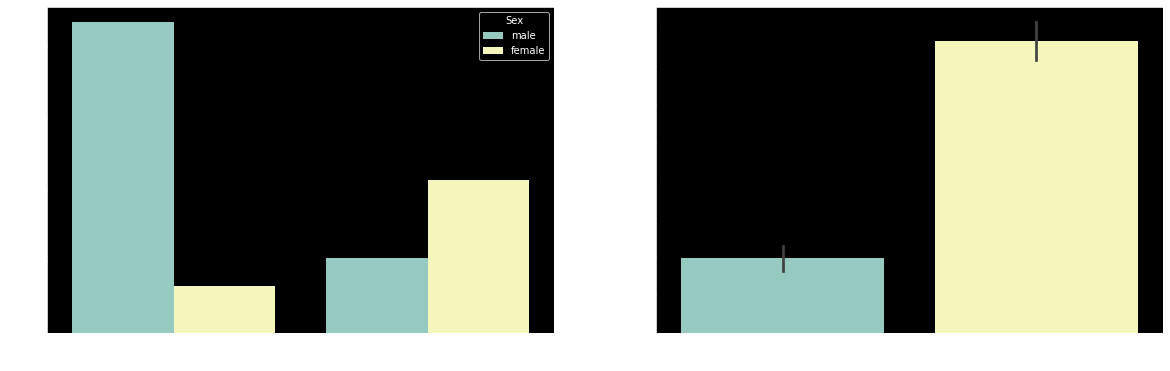

In [646]:
fig = plt.figure(figsize=(20,6))

fig.add_subplot(121)
sns.countplot(df.Survived,hue=df.Sex)
fig.add_subplot(122)
sns.barplot(df.Sex,df.Survived)

* The number of females survived is 3 times the number of males survived in the shepwreck

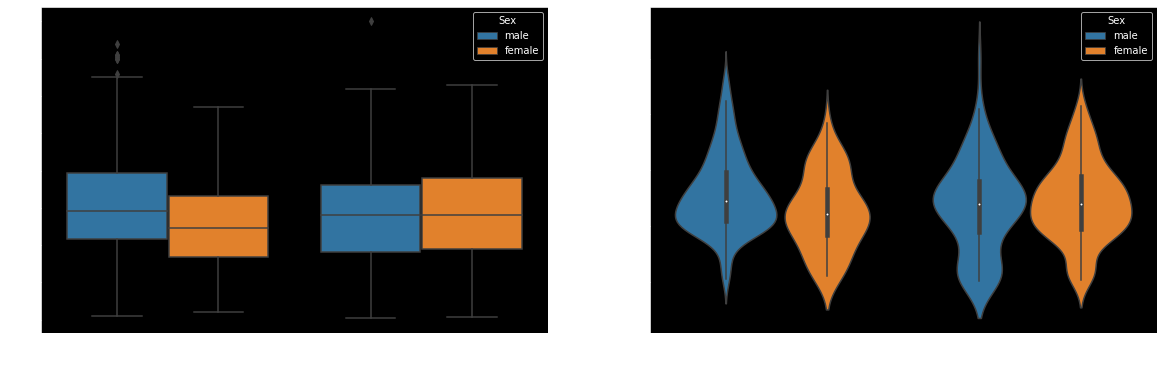

In [647]:
fig = plt.figure(figsize=(20,6))

fig.add_subplot(121)
sns.boxplot(x='Survived',y='Age',hue='Sex',data=df_raw,palette='tab10')
fig.add_subplot(122)
sns.violinplot(x='Survived',y='Age',hue='Sex',data=df_raw,palette='tab10')


Text(0.5, 1.0, 'Senior Citizens(Age above 65')

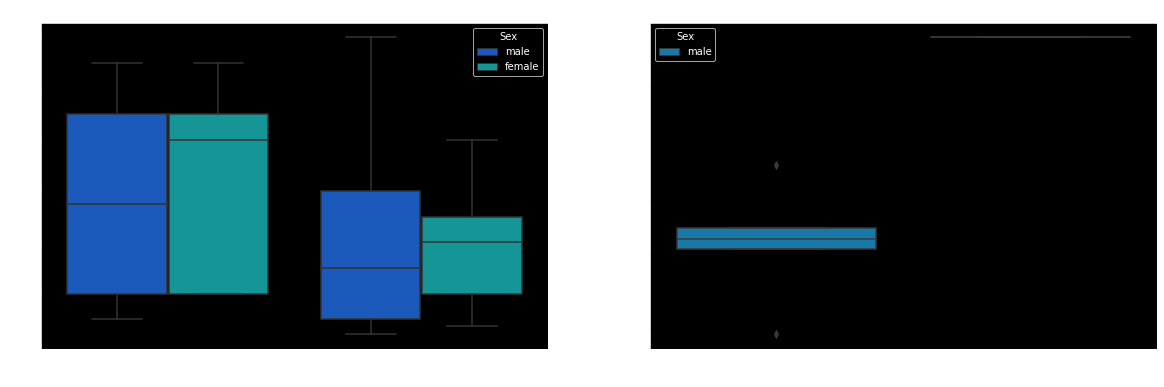

In [648]:
fig = plt.figure(figsize=(20,6))

fig.add_subplot(121)
sns.boxplot(x='Survived',y='Age',hue='Sex',data=df_raw[df_raw['Age']<13],palette='winter')
plt.title('Children Under the Age of 13')
fig.add_subplot(122)
sns.boxplot(x='Survived',y='Age',hue='Sex',data=df_raw[df_raw['Age']>65],palette='winter')
plt.title('Senior Citizens(Age above 65')

* We can infer that most of the children were survived 
* Alsmost no senior citizen made it back alive

In [649]:
df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


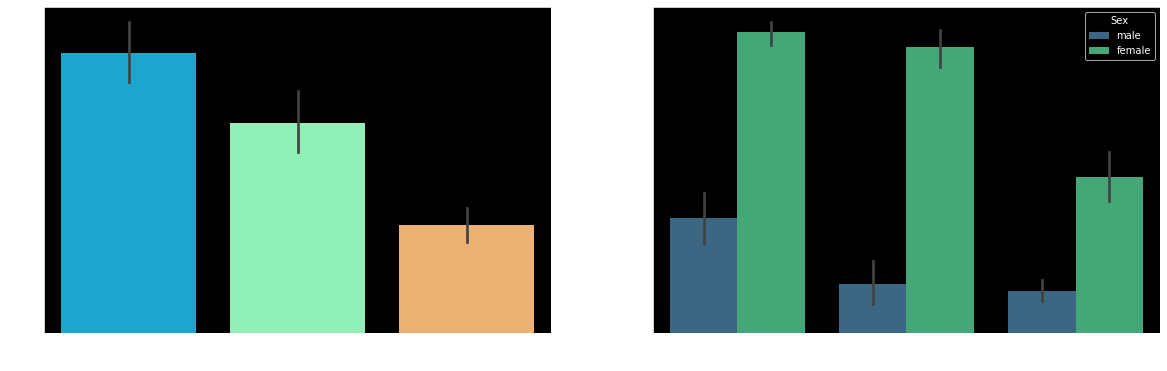

In [650]:
fig = plt.figure(figsize=(20,6))

fig.add_subplot(121)
sns.barplot(df_raw.Pclass,df_raw.Survived,palette='rainbow')
fig.add_subplot(122)
sns.barplot(df_raw.Pclass,df_raw.Survived,hue=df_raw.Sex,palette='viridis')


* Survival was highly dependent of the passengers' class

In [651]:
df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


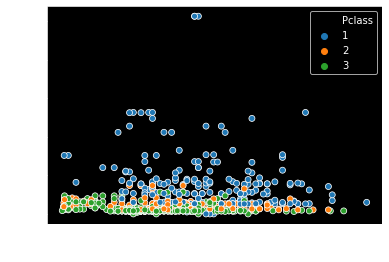

In [652]:
sns.scatterplot(df_raw.Age,df_raw.Fare,hue=df_raw.Pclass,palette='tab10')

* The fares were charged per class.

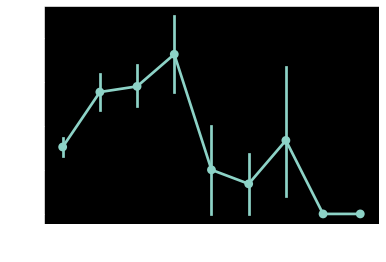

In [653]:
sns.pointplot(df_raw.SibSp+df_raw.Parch,df_raw.Survived)
plt.ylabel('Survival Probability')
plt.xlabel('Members in your family');

* Probability on survival increases untill you have 3 members in you family and starts decreasing if 3+ members in your family. 


In [654]:
df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


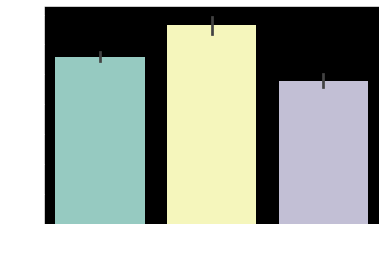

In [655]:

sns.barplot(df.Embarked,df.Fare)

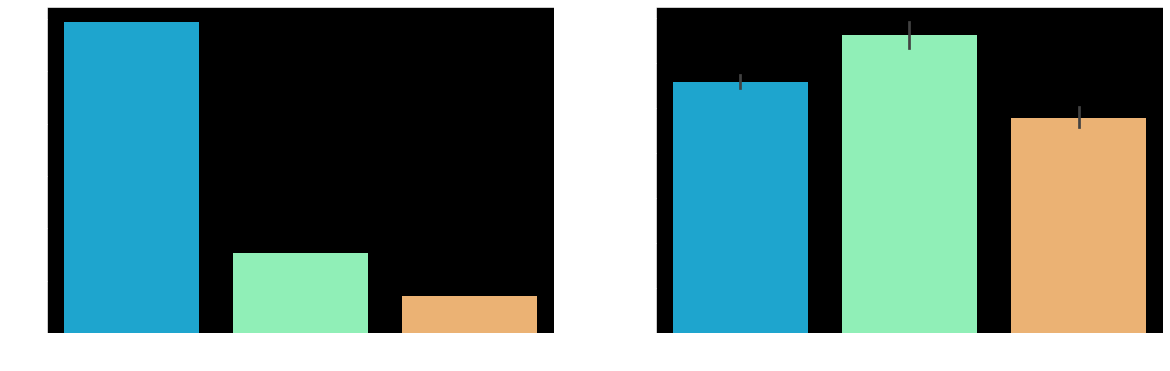

In [656]:
fig = plt.figure(figsize=(20,6))

fig.add_subplot(121)
sns.countplot(df.Embarked,palette='rainbow')
fig.add_subplot(122)
sns.barplot(df.Embarked,df.Fare,palette='rainbow')


* Most of the passengers were for S (i.e. Southampton)
* The fares for C (Cherbourg) were the highest between all three Embarks.

In [657]:
df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


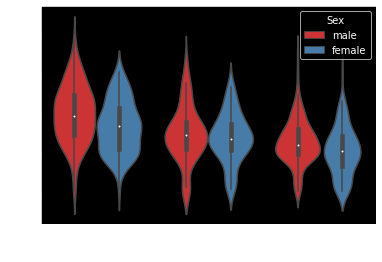

In [658]:
sns.violinplot(x="Pclass", y="Age", data=df_raw,jitter=True,hue='Sex',palette='Set1');

* Agewise the Class1 passenger's age distribution shows they were relatively older than the ones in the other class. The youngest were in Class 3.

Text(0.5, 1.0, 'Classwise Survival Distribution')

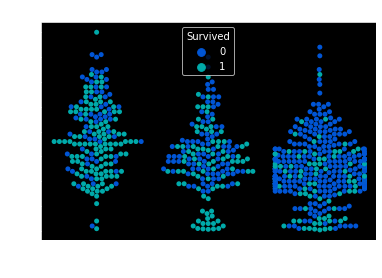

In [659]:
sns.swarmplot(x="Pclass", y="Age", data=df_raw,hue='Survived',palette='winter');
plt.title('Classwise Survival Distribution')

* We can see that the most survived passenges were from the 1st Class
* There were more children casualities in the 3rd class than any other class

In [660]:
df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


___
## Training the Model
___

In [664]:
df_cleaned.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,on_board_fam_members(incl.you),Sex_male,Embarked_S,Embarked_C,Prefix_Mr,Prefix_Mrs,Prefix_Miss
0,0,1.386294,3.135494,0.693147,0.0,2.110213,1.098612,1,1,0,1,0,0
1,1,0.693147,3.663562,0.693147,0.0,4.280593,1.098612,0,0,1,0,1,0
2,1,1.386294,3.295837,0.000000,0.0,2.188856,0.693147,0,1,0,0,0,1
3,1,0.693147,3.583519,0.693147,0.0,3.990834,1.098612,0,1,0,0,1,0
4,0,1.386294,3.583519,0.000000,0.0,2.202765,0.693147,1,1,0,1,0,0


In [676]:
# Train test split
X = df_cleaned.drop('Survived',1)
y = df_cleaned['Survived']

In [677]:
X.shape,y.shape

((818, 12), (818,))

In [678]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.22,random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((638, 12), (638,), (180, 12), (180,))

In [679]:
# standard scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [712]:
# training the model

# importing training dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB


# metrics dependencies
from sklearn.model_selection import cross_val_predict,cross_val_score

In [689]:
# training helper function

def train_n_ret_score(estimator):
  """
  train the model and return the accuracy score of ther model
  """
  model = estimator
  model.fit(X_train,y_train)
  
  
  return model.score(X_test,y_test)

In [691]:
# logistic regression

train_n_ret_score(LogisticRegression())

0.8555555555555555

In [695]:
# svc kernel

train_n_ret_score(SVC())

0.85

In [696]:
# svc linear

train_n_ret_score(SVC(kernel='linear'))

0.8388888888888889

In [701]:
# decision trees

train_n_ret_score(DecisionTreeClassifier())

0.7444444444444445

In [705]:
# Gradient Boost

train_n_ret_score(GradientBoostingClassifier())

0.8222222222222222

In [708]:
# Gaussian NB

train_n_ret_score(GaussianNB())

0.8388888888888889

In [711]:
# Random Forest

train_n_ret_score(RandomForestClassifier(criterion='entropy'))

0.7777777777777778

In [715]:
# adaboost

train_n_ret_score(AdaBoostClassifier(base_estimator=LogisticRegression(),n_estimators=100))

0.8555555555555555

___
## Cross Validation and Best Pick
___

In [716]:
mean_cv=[]
accuracy=[]
std=[]
classifiers=['Logistic','Linear Svm','Radial Svm','Decision Tree','Gradient Boost','Gaussian NB','Random Forest','Adaboost']
models=[LogisticRegression(), SVC(kernel='linear'),SVC(kernel='rbf'),DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB(),RandomForestClassifier(),AdaBoostClassifier(base_estimator=LogisticRegression())]
for i in models:
    
    model = i
    cv_result = cross_val_score(model,X_train,y_train,scoring = "accuracy")
    
    mean_cv.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    print(i)
models_df=pd.DataFrame({'CV Mean':mean_cv,'Std':std},index=classifiers)       
models_df

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                 

,CV Mean,Std
Logistic,0.802547,0.028805
Linear Svm,0.805684,0.022594
Radial Svm,0.819734,0.023853
Decision Tree,0.758588,0.041060
Gradient Boost,0.811897,0.022235
Gaussian NB,0.799373,0.020239
Random Forest,0.799299,0.039567
Adaboost,0.807222,0.026796


* let's continue with Radial Svm

___
## Grid Search Hyper Tuning
___

In [722]:
## Grid Search 
from sklearn.model_selection import GridSearchCV

# param_dict
param_dict = dict(
    C=[1.0,10,100,1000],
    kernel=['rbf','linear'],
    gamma=[0.1,0.01,0.001,'scale']
)

gs_model = GridSearchCV(SVC(),param_grid=param_dict,verbose=3)

gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=1.0, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=1.0, gamma=0.1, kernel=rbf, score=0.852, total=   0.0s
[CV] C=1.0, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=1.0, gamma=0.1, kernel=rbf, score=0.828, total=   0.0s
[CV] C=1.0, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=1.0, gamma=0.1, kernel=rbf, score=0.789, total=   0.0s
[CV] C=1.0, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=1.0, gamma=0.1, kernel=rbf, score=0.835, total=   0.0s
[CV] C=1.0, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=1.0, gamma=0.1, kernel=rbf, score=0.787, total=   0.0s
[CV] C=1.0, gamma=0.1, kernel=linear .................................
[CV] ..... C=1.0, gamma=0.1, kernel=linear, score=0.812, total=   0.0s
[CV] C=1.0, gamma=0.1, kernel=linear .................................
[CV] ..... C=1.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....... C=1.0, gamma=0.01, kernel=rbf, score=0.756, total=   0.0s
[CV] C=1.0, gamma=0.01, kernel=linear ................................
[CV] .... C=1.0, gamma=0.01, kernel=linear, score=0.812, total=   0.0s
[CV] C=1.0, gamma=0.01, kernel=linear ................................
[CV] .... C=1.0, gamma=0.01, kernel=linear, score=0.805, total=   0.0s
[CV] C=1.0, gamma=0.01, kernel=linear ................................
[CV] .... C=1.0, gamma=0.01, kernel=linear, score=0.773, total=   0.0s
[CV] C=1.0, gamma=0.01, kernel=linear ................................
[CV] .... C=1.0, gamma=0.01, kernel=linear, score=0.843, total=   0.0s
[CV] C=1.0, gamma=0.01, kernel=linear ................................
[CV] .... C=1.0, gamma=0.01, kernel=linear, score=0.795, total=   0.0s
[CV] C=1.0, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=1.0, gamma=0.001, kernel=rbf, score=0.812, total=   0.0s
[CV] C=1.0, gamma=0.001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed: 12.6min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1.0, 10, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001, 'scale'],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [723]:
gs_model.best_estimator_

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [724]:
gs_model.best_score_

0.8275959645669291

In [738]:
best_model = SVC(C=1000,gamma=0.001,probability=True)
best_model.fit(X_train,y_train)

y_preds = best_model.predict(X_test)

best_model.score(X_test,y_test)


0.8388888888888889

In [739]:
np.mean(cross_val_score(best_model,X,y))

0.8129732156217268

* Just improvement of 0.001 percent on the CV score,but still an improvement

___
## Metrics Evaluations
___

In [768]:
# importing metrics dependencies

from sklearn.metrics import roc_curve,roc_auc_score,classification_report,confusion_matrix,plot_confusion_matrix,plot_precision_recall_curve

In [771]:
# classification report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88       113
           1       0.83      0.72      0.77        67

    accuracy                           0.84       180
   macro avg       0.84      0.81      0.82       180
weighted avg       0.84      0.84      0.84       180



In [772]:
confusion_matrix(y_test,y_preds)

array([[103,  10],
       [ 19,  48]])

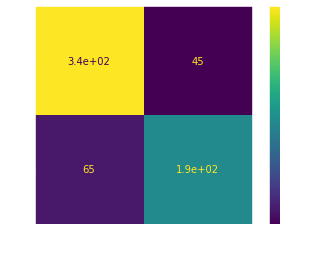

In [774]:
plot_confusion_matrix(best_model,X_train,y_train)

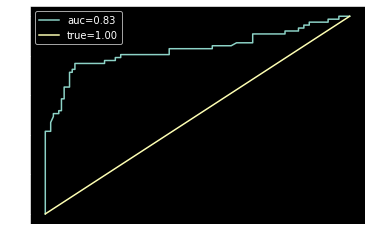

In [758]:
y_pred_proba = best_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc)[:4])
plt.plot(tpr,tpr,label='true=1.00')
plt.legend()
plt.show()

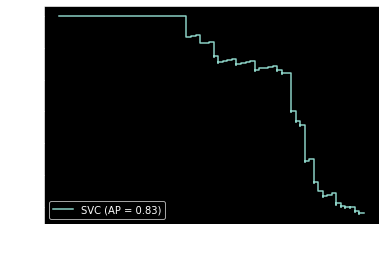

In [767]:
# precision to recall curve
plot_precision_recall_curve(best_model,X_test,y_test)